# Date and Time Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

## SF Temps

In [2]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [3]:
sf_temps = data.sf_temps()
sf_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
sf_temps = sf_temps.set_index('date').sort_index()

In [5]:
sf_temps.asfreq('M')

,temp
date,
2010-01-31,49.4
2010-02-28,51.0
2010-03-31,51.4
2010-04-30,53.0
2010-05-31,55.0
2010-06-30,56.6
2010-07-31,57.6
2010-08-31,58.8
2010-09-30,58.1


In [6]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


### 2. Write the code necessary to visualize the minimum temperature over time.


In [7]:
sf_temps.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:xlabel='date'>

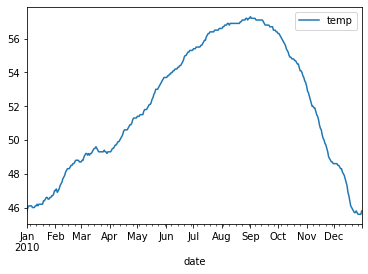

In [8]:
sf_temps.resample('D').min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

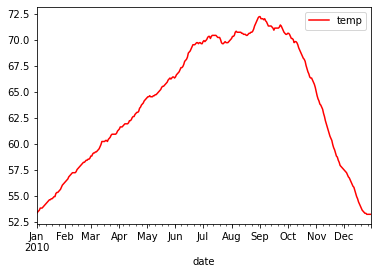

In [9]:
sf_temps.resample('D').max().plot(c='red')

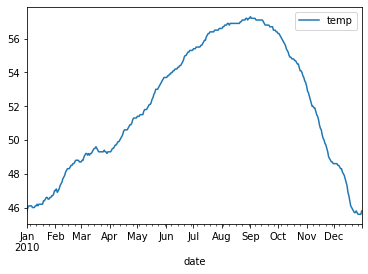

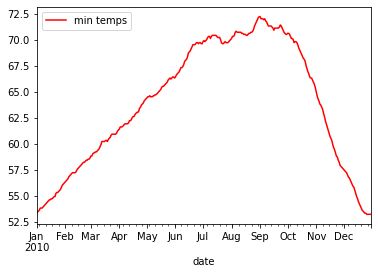

In [10]:
sf_temps.resample('D').min().plot()
sf_temps.resample('D').max().plot(c='red')
plt.legend(["min temps", "max temps"])

### 4. Which month is the coldest, on average?


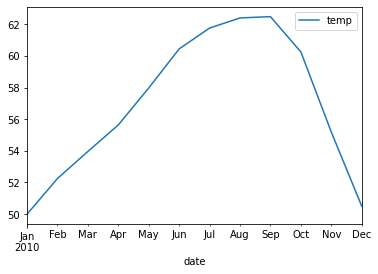

In [12]:
sf_temps.resample('M').mean().plot()
min_avg = sf_temps.resample('M').mean()


### 5. Which month has the highest average temperature?


temp    62.487083
dtype: float64

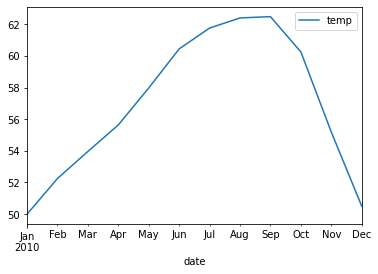

In [14]:
sf_temps.resample('M').mean().plot()
sf_temps.resample('M').mean().max()

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [15]:
sf_temps.agg(['min', 'max'])

,temp
min,45.6
max,72.2


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

## Seattle Weather

In [18]:
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.set_index('date').

### 1. Which year and month combination has the highest amount of precipitation?


In [19]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [20]:
df.groupby(['year', 'month']).precipitation.sum().sort_values().tail()

year  month
2012  3        183.0
      11       210.5
2015  11       212.6
2014  3        240.0
2015  12       284.5
Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

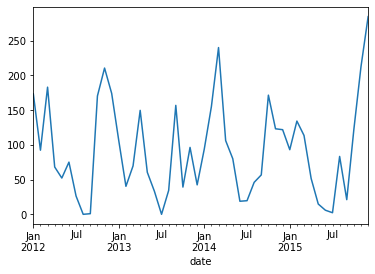

In [21]:
# Date must be set as the index before resampling
df.set_index('date').resample('M').precipitation.sum().plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

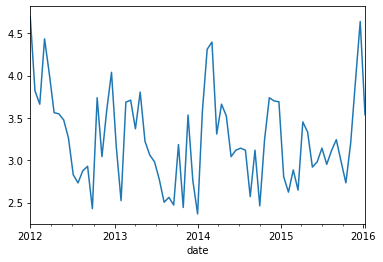

In [22]:
# Date must be set as the index before resampling
df.set_index('date').wind.resample('3W').mean().plot()

### 4. Which year-month combination is the windiest?


In [23]:
df.groupby(['year', 'month']).wind.mean().sort_values().tail()

year  month
2012  2        3.903448
2014  11       3.983333
2012  3        4.248387
2015  12       4.341935
2014  2        4.528571
Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [24]:
df[df.weather == 'sun'].groupby('year').size()

year
2012    118
2013    205
2014    211
2015    180
dtype: int64

### 6. In which month does it rain the most?


In [25]:
df.groupby('month').precipitation.sum().sort_values().tail(1)

month
11    642.5
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [26]:
df['did_rain'] = df.precipitation > 0
df.groupby('month').did_rain.sum().sort_values().tail(1)

month
12    81
Name: did_rain, dtype: int64

## Flights

In [28]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


### 1. Convert any negative delays to 0.


In [29]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [30]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


### 2. Which hour of the day has the highest average delay?


In [31]:
df.groupby(df.date.dt.hour).delay.mean().sort_values().tail(3)

date
0    127.916667
1    170.000000
3    302.500000
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?


In [32]:
df.groupby(df.date.dt.day_name()).delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?

In [33]:
df.groupby(df.date.dt.month).delay.mean().sort_values()

date
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64

## Bonus Vega Dataset

In [34]:
df = data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
